### 1. Loading Libraries

In [1]:
import numpy  as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date

%matplotlib inline 

## 2. Assesing Data

In [2]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.shape

(183412, 16)

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### Getting 10 maximum durations

In [7]:
df.nlargest(10, ["duration_sec"])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
101361,85444,2019-02-13 17:59:55.1240,2019-02-14 17:43:59.9540,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,6168,Subscriber,NaN,NaN,No
85465,84548,2019-02-16 15:48:25.0290,2019-02-17 15:17:33.0800,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,-122.419622,6301,Subscriber,1981.0,Male,No
153705,83772,2019-02-05 12:44:54.2860,2019-02-06 12:01:06.6310,78.0,Folsom St at 9th St,37.773717,-122.411647,345.0,Hubbell St at 16th St,37.766483,-122.398279,3405,Customer,NaN,NaN,No
127999,83519,2019-02-09 15:16:17.5370,2019-02-10 14:28:17.2700,72.0,Page St at Scott St,37.772406,-122.435650,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5561,Customer,1990.0,Male,No
112435,83407,2019-02-11 16:25:33.0690,2019-02-12 15:35:40.9560,77.0,11th St at Natoma St,37.773507,-122.416040,344.0,16th St Depot,37.766349,-122.396292,1842,Customer,1988.0,Male,No
5203,83195,2019-02-27 14:47:23.1810,2019-02-28 13:53:58.4330,243.0,Bancroft Way at College Ave,37.869360,-122.254337,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,5781,Subscriber,1962.0,Female,Yes
95750,82512,2019-02-14 13:56:21.7280,2019-02-15 12:51:34.3150,368.0,Myrtle St at Polk St,37.785434,-122.419622,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,6152,Customer,1998.0,Other,No
173365,82385,2019-02-02 13:07:43.0360,2019-02-03 12:00:48.1750,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,2933,Customer,NaN,NaN,No
8631,81549,2019-02-27 09:41:38.5520,2019-02-28 08:20:48.3860,138.0,Jersey St at Church St,37.750900,-122.427411,140.0,Cesar Chavez St at Dolores St,37.747858,-122.424986,2266,Subscriber,1963.0,Female,No
176987,80891,2019-02-01 11:05:18.9760,2019-02-02 09:33:30.1690,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,55.0,Webster St at Grove St,37.777053,-122.429558,3133,Customer,NaN,NaN,No


##### Displaying the maximum trip duration of 85444 which is 23.73 hours

In [8]:
df[df.duration_sec == 85444 ]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
101361,85444,2019-02-13 17:59:55.1240,2019-02-14 17:43:59.9540,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,6168,Subscriber,NaN,NaN,No


In [9]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

### a. Findings

### 1- Tidiness

###### T1. Month column is missing in the dataset
###### T2. Duration in seconds conveys perception of time
###### T3. No "Day" column to show name of day.
##### T4.No "Age" column to show their age

### II. Qualities

##### Q1. Erroneous datatypes (start_time, end_time, start_station_id,end_station_id,bike_id) 


### 4. Cleaning Data

##### i. Creating Dataframe Copy

In [11]:
clean_df = df.copy()

#### ii. Cleaning Tidiness Issues

T1. Month column is missing in all datasets.

#### Define

Month column will be added to the dataset with the month name

converting start_date and end_date date type to datetime

In [12]:
clean_df[["start_time", "end_time"]] = clean_df[["start_time", "end_time"]].apply(pd.to_datetime)

In [13]:
clean_df["month"] = clean_df["start_time"].dt.month_name()

Saving dataframes to csv files excluding index column

In [14]:
clean_df.to_csv("Ford_2019.csv", index = False)

#### Test

In [15]:
clean_df = pd.read_csv("Ford_2019.csv")

In [16]:
clean_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,February
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,February


In [17]:
clean_df.shape

(183412, 17)

T2. Duration in seconds conveys unclear sensation of time 

##### Code

In [18]:
clean_df.insert(1, "duration_minutes", clean_df.duration_sec/60)
clean_df.insert(1, "duration_hours", clean_df.duration_sec/3600)
clean_df.insert(1, "duration_days", clean_df.duration_hours/24)

#### Test

In [19]:
clean_df.head()

,duration_sec,duration_days,duration_hours,duration_minutes,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month
0,52185,0.603993,14.495833,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,February
1,42521,0.492141,11.811389,708.683333,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,February
2,61854,0.715903,17.181667,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,February
3,36490,0.422338,10.136111,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,February
4,1585,0.018345,0.440278,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,February


T3. No Day column to show name of the day.

##### Define :

Add another 2 columns (start_day, end_day) containing day name obtained from the start_time and the end_time after converting data type to datetime.

##### Code:

Create new column containing date name 

Month column will be added to the dataset with the month name

In [20]:
clean_df[["start_time", "end_time"]] = clean_df[["start_time", "end_time"]].apply(pd.to_datetime)

In [21]:
clean_df.insert(4, "start_day", clean_df["start_time"].dt.day_name())
clean_df.insert(4, "end_day", clean_df["end_time"].dt.day_name())

##### Test:

In [22]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   duration_days            183412 non-null  float64       
 2   duration_hours           183412 non-null  float64       
 3   duration_minutes         183412 non-null  float64       
 4   end_day                  183412 non-null  object        
 5   start_day                183412 non-null  object        
 6   start_time               183412 non-null  datetime64[ns]
 7   end_time                 183412 non-null  datetime64[ns]
 8   start_station_id         183215 non-null  float64       
 9   start_station_name       183215 non-null  object        
 10  start_station_latitude   183412 non-null  float64       
 11  start_station_longitude  183412 non-null  float64       
 12  end_station_id  

##### T4 No "Age" column to show their age

#### Define :

Add another column (member_age) containing ages obtain from the member_birth_year

#### Code :

Create new column containing members ages

In [23]:
current_year = date.today().year

In [24]:
clean_df["member_age"] =current_year -  clean_df["member_birth_year"]

#### C. Cleaning Quality Issues.

Q1. Erroneous datatypes (start_time, end_time, start_station_id, end_station_id, bike_id)

#### Define:

Convert start_station_id, end_station_id, bike_id to string since no operation will be perform on its values

#### Code :

In [25]:
clean_df[["start_station_id", "end_station_id", "bike_id"]] = clean_df[["start_station_id", "end_station_id", "bike_id"]].astype(str)

#### Test

In [26]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   duration_days            183412 non-null  float64       
 2   duration_hours           183412 non-null  float64       
 3   duration_minutes         183412 non-null  float64       
 4   end_day                  183412 non-null  object        
 5   start_day                183412 non-null  object        
 6   start_time               183412 non-null  datetime64[ns]
 7   end_time                 183412 non-null  datetime64[ns]
 8   start_station_id         183412 non-null  object        
 9   start_station_name       183215 non-null  object        
 10  start_station_latitude   183412 non-null  float64       
 11  start_station_longitude  183412 non-null  float64       
 12  end_station_id  

In [27]:
pd.set_option('display.max_rows', 10)
clean_df.member_age.value_counts()

34.0     10236
29.0      9325
33.0      8972
32.0      8658
31.0      8498
         ...  
94.0         1
112.0        1
92.0         1
95.0         1
144.0        1
Name: member_age, Length: 75, dtype: int64

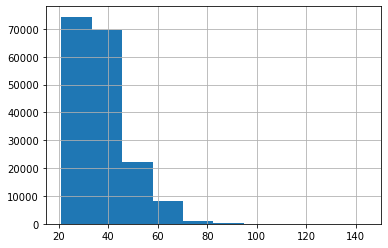

In [28]:
clean_df.member_age.hist();

From the histogram plot, we can see that we have outliers and majority of members age in dataset are between 20 and 70, we would remove this outliers and begin exploration.

Removing outliers

In [29]:
clean_df = clean_df.query('member_age<=70')

Converting members_age and members_birth_year to integer 

In [30]:
clean_df.member_birth_year =clean_df.member_birth_year.astype('int64')
clean_df.member_age = clean_df.member_age.astype('int64')  

In [31]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174115 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174115 non-null  int64         
 1   duration_days            174115 non-null  float64       
 2   duration_hours           174115 non-null  float64       
 3   duration_minutes         174115 non-null  float64       
 4   end_day                  174115 non-null  object        
 5   start_day                174115 non-null  object        
 6   start_time               174115 non-null  datetime64[ns]
 7   end_time                 174115 non-null  datetime64[ns]
 8   start_station_id         174115 non-null  object        
 9   start_station_name       173920 non-null  object        
 10  start_station_latitude   174115 non-null  float64       
 11  start_station_longitude  174115 non-null  float64       
 12  end_station_id  

### 5. Storing Data

In [32]:
clean_df.to_csv("Clean_Ford_2019.csv", encoding = 'UTF-8')

### 6. Data Analysis and Visualization

#### A. Exploratory Data Analysis

i. Univariate Exploration

In [33]:
df_2019 = pd.read_csv("Clean_Ford_2019.csv")

In [34]:
df_2019.head()

,Unnamed: 0,duration_sec,duration_days,duration_hours,duration_minutes,end_day,start_day,start_time,end_time,start_station_id,...,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,member_age
0,0,52185,0.603993,14.495833,869.750000,Friday,Thursday,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,...,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,February,38
1,2,61854,0.715903,17.181667,1030.900000,Friday,Thursday,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,...,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,February,50
2,3,36490,0.422338,10.136111,608.166667,Friday,Thursday,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,...,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,February,33
3,4,1585,0.018345,0.440278,26.416667,Friday,Thursday,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,...,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,February,48
4,5,1793,0.020752,0.498056,29.883333,Friday,Thursday,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,...,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,February,63


##### Average duration

In [35]:
df_2019.describe()

,Unnamed: 0,duration_sec,duration_days,duration_hours,duration_minutes,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,member_age
count,174115.000000,174115.000000,174115.000000,174115.000000,174115.000000,173920.000000,174115.000000,174115.000000,173920.000000,174115.000000,174115.000000,174115.000000,174115.000000,174115.000000
mean,91632.418465,704.433242,0.008153,0.195676,11.740554,139.054732,37.770737,-122.351249,136.643526,37.770931,-122.350823,4483.045028,1985.055567,36.944433
std,52996.453496,1644.837572,0.019037,0.456899,27.413960,111.696450,0.101227,0.118592,111.370352,0.101136,0.118156,1657.783873,9.560328,9.560328
min,0.000000,61.000000,0.000706,0.016944,1.016667,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1952.000000,21.000000
25%,45762.500000,323.000000,0.003738,0.089722,5.383333,47.000000,37.770083,-122.411901,44.000000,37.770407,-122.411647,3802.000000,1980.000000,30.000000
50%,91843.000000,511.000000,0.005914,0.141944,8.516667,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397405,4960.000000,1987.000000,35.000000
75%,137565.500000,789.000000,0.009132,0.219167,13.150000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.285171,5505.000000,1992.000000,42.000000
max,183411.000000,84548.000000,0.978565,23.485556,1409.133333,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,70.000000


##### Duration of the bike rides in minutes

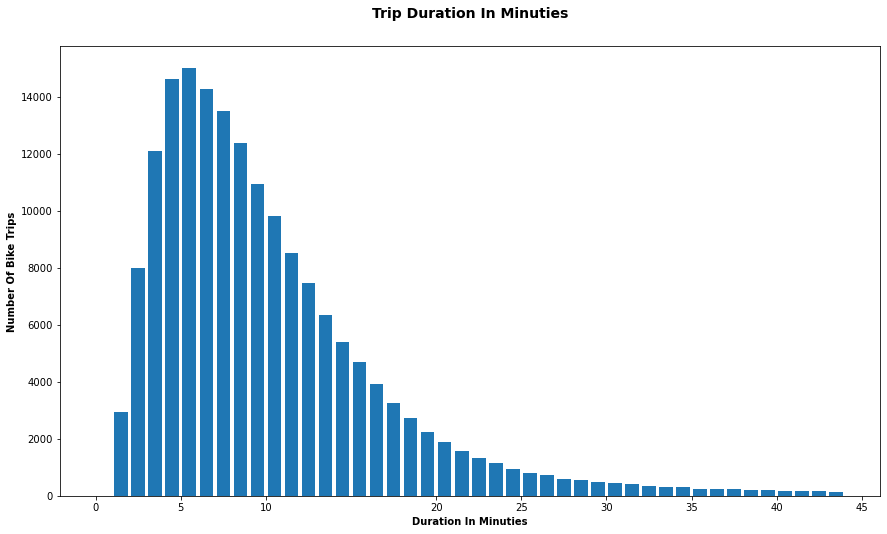

In [36]:
plt.figure(figsize = [14.70, 8.27])
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 20, 25, 30, 35,40,45]
labels = ["{}".format(val) for val in ticks]

plt.hist(data =df_2019, x = "duration_minutes", bins = bin_edges, rwidth = 0.8);
plt.title("Trip Duration In Minuties", y = 1.05, fontsize = 14, fontweight = "bold")
plt.xlabel("Duration In Minuties", fontweight = "bold")
plt.xticks(ticks, labels)
plt.ylabel("Number Of Bike Trips", fontweight="bold");

Average ride duration lies in the 3-14 minute range  

#### The count of each member with respect to there age

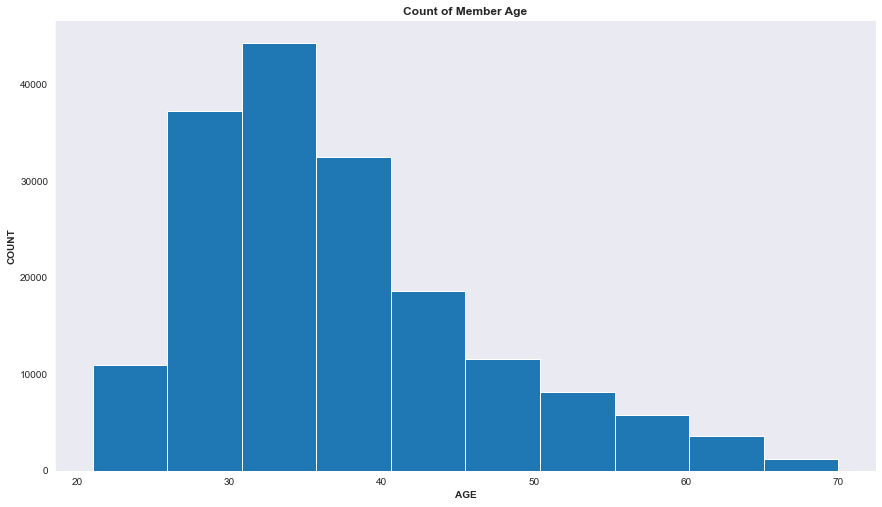

In [79]:
plt.figure(figsize = [14.70, 8.27])
plt.hist(data=df_2019, x='member_age')
plt.grid(False)
plt.xlabel('AGE', fontweight = "bold")
plt.ylabel('COUNT', fontweight = "bold")
plt.title('Count of Member Age', fontweight = "bold")
sb.despine();

From the plot above, we can see that our users are between the ages of 20 and 70 with majority of them around age 20- 45 which is also the same age range of working adults. also notr that during cleaning we dropped riders above 70

#### Checking Monthly Usage 

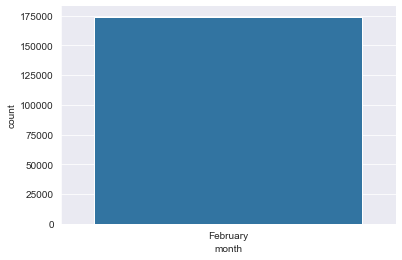

In [72]:
base_color = sb.color_palette()[0]
sb.countplot(data =df_2019, x='month', color=base_color,)
sb.despine();

Apparently all our Data was gotten in the month of Febuary. Let's look at day of the week and see what insights we get.

##### When are the most trips taken in terms of day of the week

In [39]:
df_2019.start_day.value_counts()

Thursday     33546
Tuesday      30459
Wednesday    28324
Friday       27512
Monday       25519
Sunday       14398
Saturday     14357
Name: start_day, dtype: int64

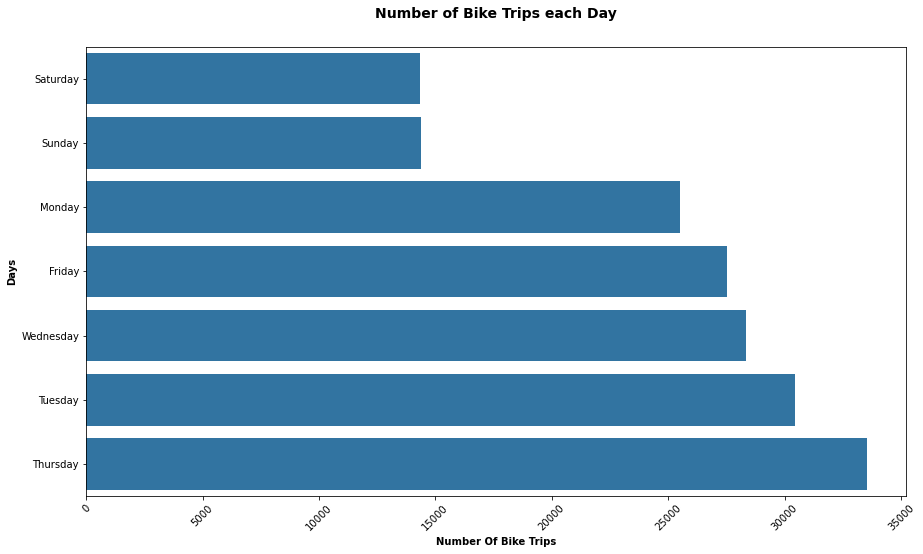

In [40]:
plt.figure(figsize = [14.70, 8.27])
base_color = sb.color_palette()[0]
startDay_order = df_2019["start_day"].value_counts(ascending = True).index
sb.countplot(data = df_2019, y = "start_day", color = base_color, order = startDay_order)


plt.title("Number of Bike Trips each Day", y = 1.05, fontsize = 14, fontweight = "bold")
plt.ylabel("Days", fontweight = "bold")
plt.xlabel("Number Of Bike Trips", fontweight="bold")
plt.xticks(rotation = 45);

Most Trips were taken on Thursdays

##### When did most trips end in terms of day of the week

In [41]:
df_2019.end_day.value_counts()

Thursday     33541
Tuesday      30466
Wednesday    28315
Friday       27504
Monday       25519
Sunday       14405
Saturday     14365
Name: end_day, dtype: int64

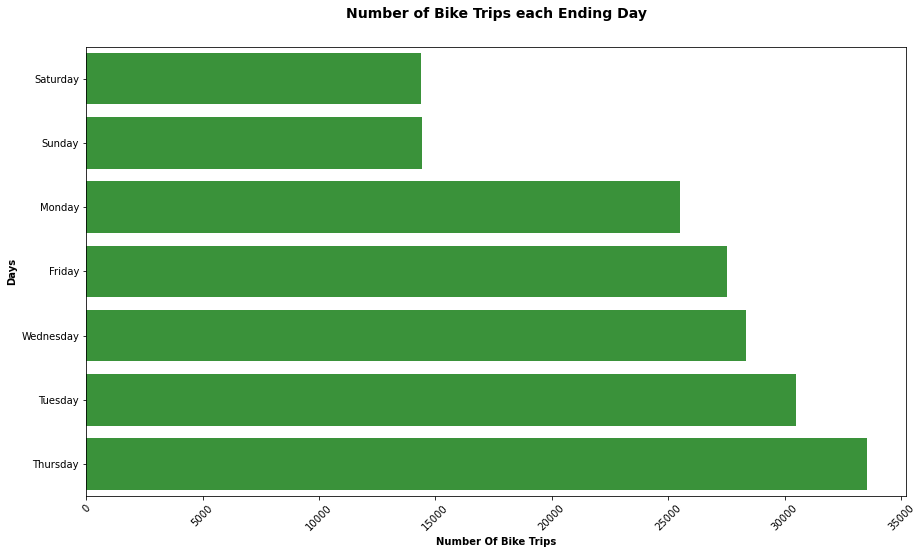

In [42]:
plt.figure(figsize = [14.70, 8.27])
base_color = sb.color_palette()[2]
endDay_order = df_2019["end_day"].value_counts(ascending = True).index
sb.countplot(data = df_2019, y = "end_day", color = base_color, order = endDay_order)


plt.title("Number of Bike Trips each Ending Day", y = 1.05, fontsize = 14, fontweight = "bold")
plt.ylabel("Days", fontweight = "bold")
plt.xlabel("Number Of Bike Trips", fontweight="bold")
plt.xticks(rotation = 45);

Most Trips ended on Thrusday

##### Which gender has  the highest Bike trips 

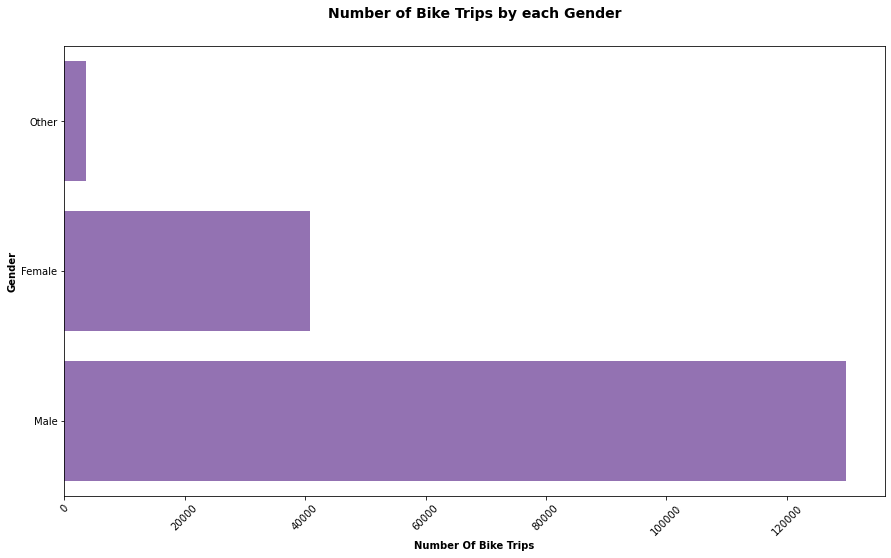

In [43]:
plt.figure(figsize = [14.70, 8.27])
base_color = sb.color_palette()[4]
startDay_order = df_2019["member_gender"].value_counts(ascending = True).index
sb.countplot(data = df_2019, y = "member_gender", color = base_color, order = startDay_order)


plt.title("Number of Bike Trips by each Gender", y = 1.05, fontsize = 14, fontweight = "bold")
plt.ylabel("Gender", fontweight = "bold")
plt.xlabel("Number Of Bike Trips", fontweight="bold")
plt.xticks(rotation = 45);

Most Trips were done by Male

#### Which gender is the highest user

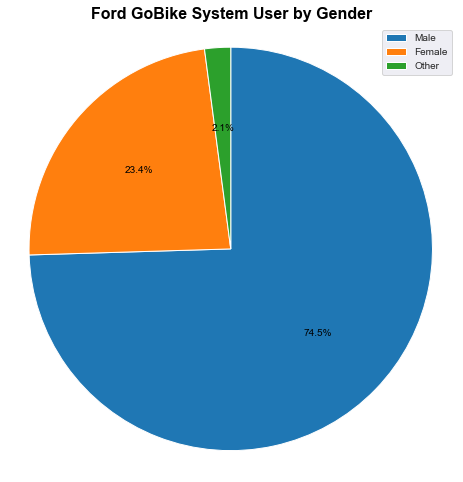

In [73]:
plt.figure(figsize = [14.70, 8.27])
gender = df_2019.member_gender.value_counts()
plt.pie(gender, startangle = 90, autopct= '%1.1f%%', counterclock = False, textprops={'color':'Black'});
plt.axis('square');
plt.title('Ford GoBike System User by Gender', y=1, fontsize=16, color = 'Black', fontweight = "bold")
plt.legend(gender.index)

Majority of fordgobike users are males with a whopping 74.5% as seen above

##### What are the number of most Bike Trips with respect to Age

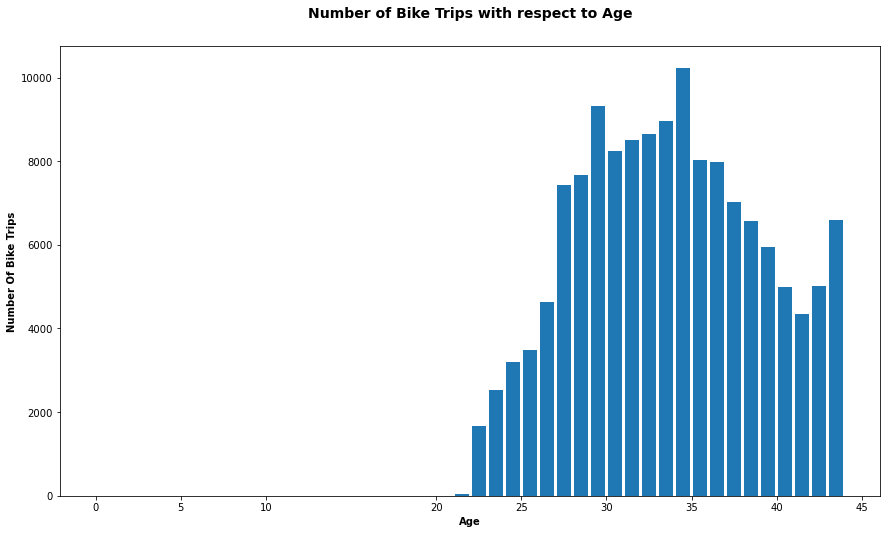

In [45]:
plt.figure(figsize = [14.70, 8.27])
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 20, 25, 30, 35,40,45]
labels = ["{}".format(val) for val in ticks]

plt.hist(data =df_2019, x = "member_age", bins = bin_edges, rwidth = 0.8);
plt.title("Number of Bike Trips with respect to Age", y = 1.05, fontsize = 14, fontweight = "bold")
plt.xlabel("Age", fontweight = "bold")
plt.xticks(ticks, labels)
plt.ylabel("Number Of Bike Trips", fontweight="bold");

Average age for Most Bike rider's lies between 27-39 and 44

#### Who are the majority user with respect to the user type

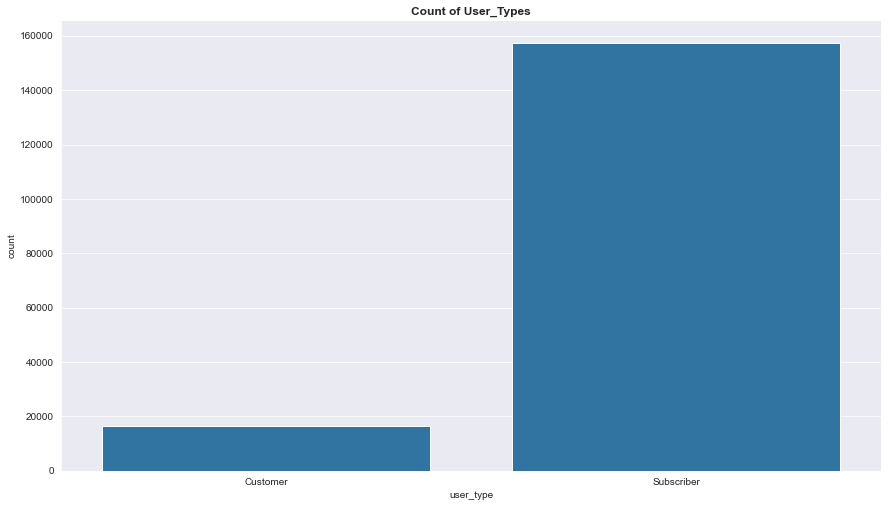

In [74]:
plt.figure(figsize = [14.70, 8.27])
base_color = sb.color_palette()[0]
sb.countplot(data = df_2019, x='user_type', color=base_color )
plt.title('Count of User_Types', fontweight = "bold")
sb.despine();

Majority of Users are Also Subscribers.

##### When are most trips taken in terms of month of the year

In [47]:
df_2019.member_gender.value_counts()

Male      129754
Female     40737
Other       3624
Name: member_gender, dtype: int64

In [48]:
df_2019.member_gender.describe()

count     174115
unique         3
top         Male
freq      129754
Name: member_gender, dtype: object

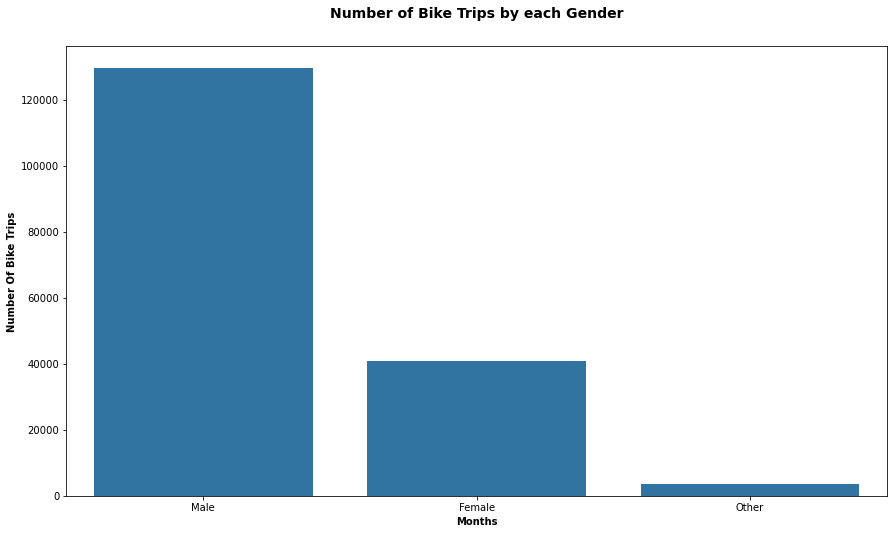

In [49]:
plt.figure(figsize = [14.70, 8.27])
base_color = sb.color_palette()[0]
gender = df_2019["member_gender"].value_counts().index
sb.countplot(data = df_2019, x = "member_gender", color = base_color, order = gender)


plt.title("Number of Bike Trips by each Gender", y = 1.05, fontsize = 14, fontweight = "bold")
plt.xlabel("Months", fontweight = "bold")
plt.ylabel("Number Of Bike Trips", fontweight="bold");

More Trips are taken by the Male Gender

#### ii.Bivariate Exploration

#### Does trip duration depends on user type?

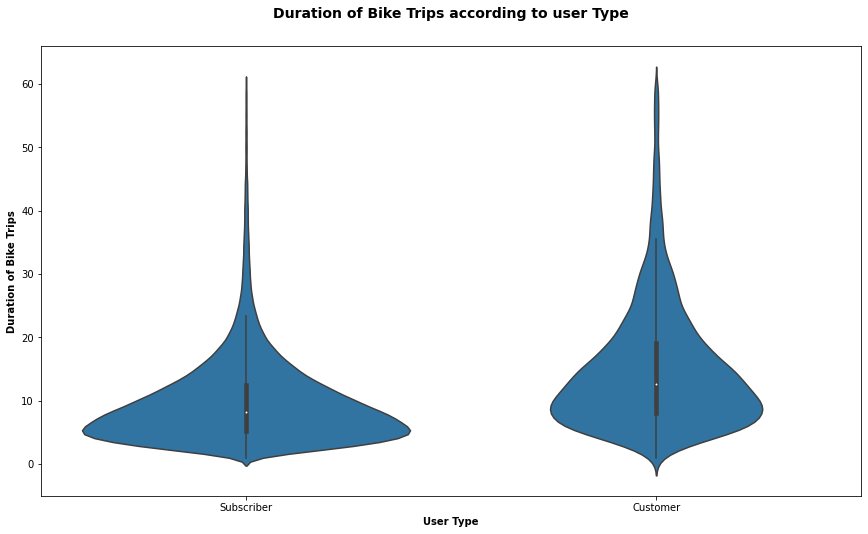

In [50]:
plt.figure(figsize =[14.70, 8.27])
sb.violinplot(data = df_2019.query("duration_minutes <= 60"), x = "user_type", y = "duration_minutes", color = sb.color_palette()[0])
plt.xlabel("User Type", fontweight = "bold")
plt.ylabel("Duration of Bike Trips", fontweight = "bold")
plt.title("Duration of Bike Trips according to user Type", y = 1.05, fontsize = 14, fontweight = "bold");

At duration less than or equal to 60 minutes, both customers(casual) has achieved less duration of ues to the subscriber (members).

#### Is there a relatioship between duration and customer's age?

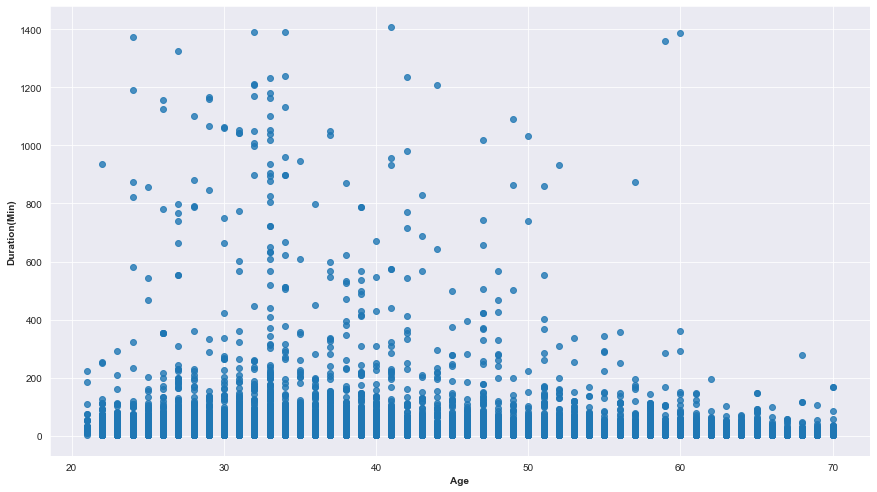

In [75]:
plt.figure(figsize =[14.70, 8.27])
sb.regplot(data = df_2019, x = 'member_age', y = 'duration_minutes', fit_reg =False)
plt.xlabel('Age', fontweight = "bold")
plt.ylabel('Duration(Min)',  fontweight = "bold");

We see that there is no obvious relationship and all we can infer from this data is most trips are below 200 mins

Butgoing back to univarate exploration, we were able to discover that the bulk of our data lies between 0-41 minutes, so we'll create a dataframe that only shows durations within this limit

#### Does trip duration depends on Gender?

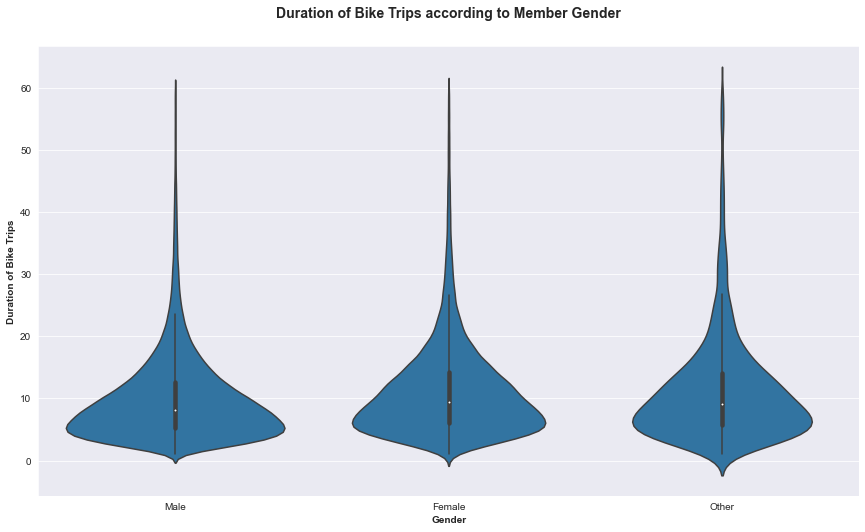

In [80]:
plt.figure(figsize =[14.70, 8.27])
sb.violinplot(data = df_2019.query("duration_minutes <= 60"), x = "member_gender", y = "duration_minutes", color = sb.color_palette()[0])
plt.xlabel("Gender", fontweight = "bold")
plt.ylabel("Duration of Bike Trips", fontweight = "bold")
plt.title("Duration of Bike Trips according to Member Gender", y = 1.05, fontsize = 14, fontweight = "bold");

At duration less than or equal to 60 minutes, the Male gender has achieved more duration of use to other Genders (Female and other)

##### creating minute dataframe

In [76]:
minutes_df = df_2019.query('duration_minutes <= 42')

Plotting the scatterplot utilizing jitter and transparency so we can better visualize the trend

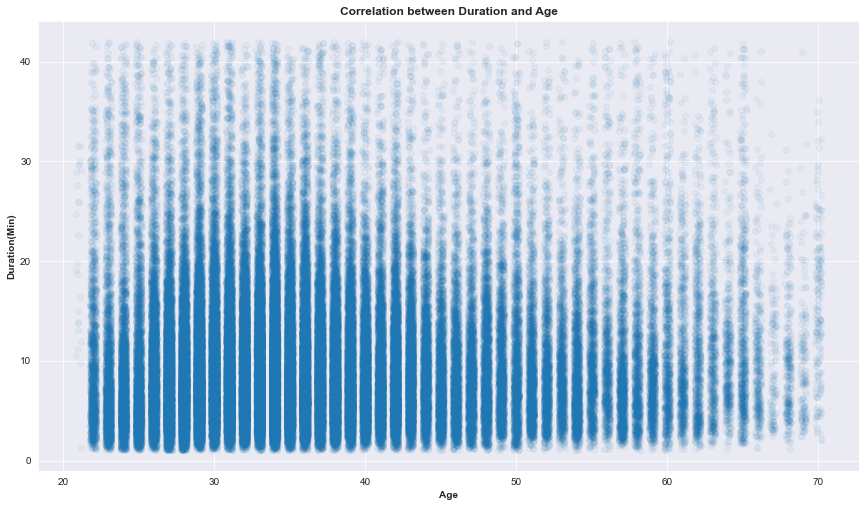

In [77]:
plt.figure(figsize =[14.70, 8.27])
sb.regplot(data = minutes_df, x = 'member_age', y = 'duration_minutes', fit_reg =False, truncate=False, x_jitter=0.2, scatter_kws={'alpha':1/20});
plt.xlabel('Age', fontweight = "bold")
plt.ylabel('Duration(Min)', fontweight = "bold")
plt.title('Correlation between Duration and Age', fontweight = "bold");

There's a clear trend that the duration of rides diminishes with Age, with peak around 25 - 40 years

 #### how does the trip duration varies within Users?

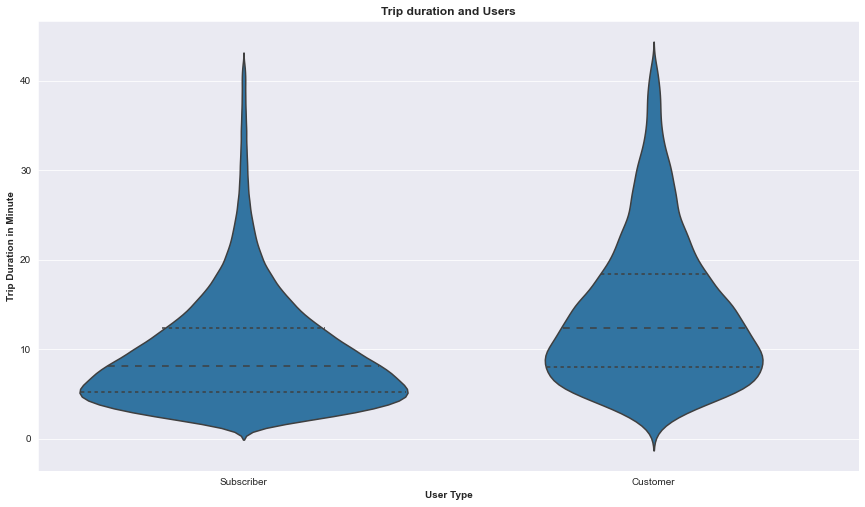

In [78]:
plt.figure(figsize =[14.70, 8.27])
sb.violinplot(data=minutes_df, x='user_type', y='duration_minutes', color=base_color, inner='quartile');
plt.xlabel('User Type', fontweight = "bold");
plt.ylabel('Trip Duration in Minute', fontweight = "bold")
plt.title('Trip duration and Users', fontweight = "bold");

generally, customers tend to go on longer trips, we see that shorter trips are more prevalent among the subscribers.

### iii. Multivariate

#### Is there a relationship between day,duration_minutes and also the user_type

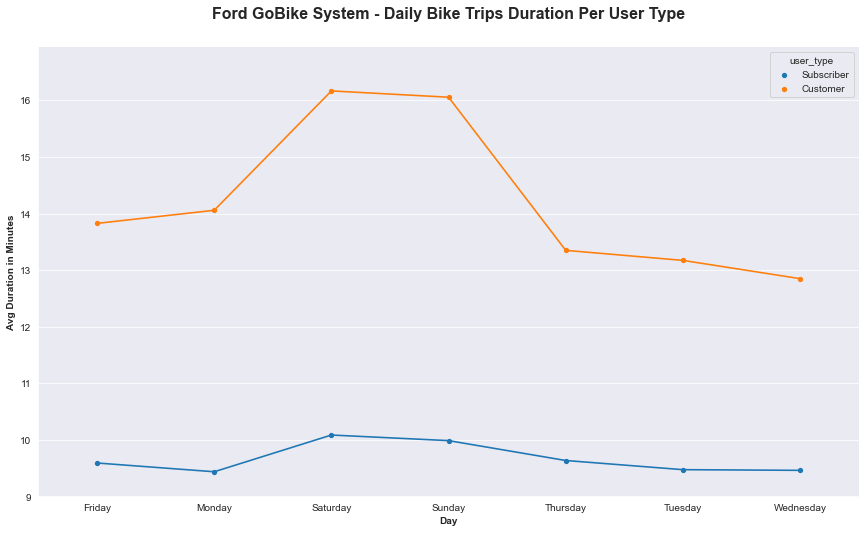

In [70]:
plt.figure(figsize =[14.70, 8.27])
sb.set_style("darkgrid")
day_order = minutes_df['start_day'].value_counts().sort_index().index
sb.pointplot(data = minutes_df, x='start_day', y='duration_minutes', hue='user_type', scale=.6, order = day_order, height=5, aspect=2, errwidth=False);
plt.xlabel('Day', fontweight = 'bold')
plt.ylabel('Avg Duration in Minutes', fontweight = 'bold')
plt.title("Ford GoBike System - Daily Bike Trips Duration Per User Type", y = 1.05, fontsize = 16, fontweight = 'bold');
sb.despine()


We see a spike in trip duration on days that fall on weekends for customers and subscribers with customers taking longer trips

Checking the next plot on days of the week and see if we can get better insights

#### Is there any relationship between weekday,duration of mins and also the usertype ?

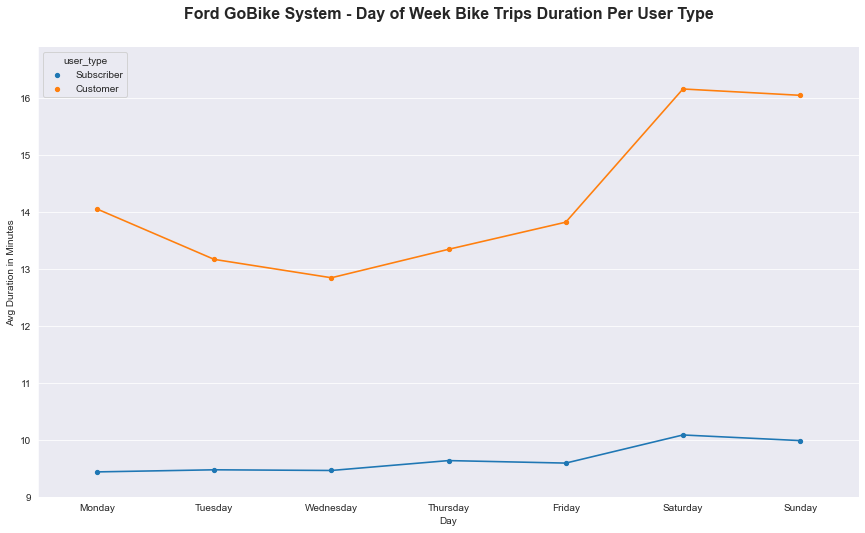

In [69]:
plt.figure(figsize =[14.70, 8.27])
sb.set_style("darkgrid")
order= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.pointplot(data = minutes_df, x='start_day', y='duration_minutes', hue='user_type', scale=.6, order = order, height=5, aspect=2, errwidth=False);
plt.xlabel('Day')
plt.ylabel('Avg Duration in Minutes')
plt.title("Ford GoBike System - Day of Week Bike Trips Duration Per User Type", y = 1.05, fontsize = 16, fontweight = 'bold');
sb.despine()

Customers tend to take longer trips on average during weekdays with a relative spike during weekends as opposed to subscribers who take shorter trips in general during weekdays with a little spike during weekends.

#### Is there any relationship between the weekday,duration in minutes and also member age

In [81]:
minutes_df['age_bins'] = minutes_df['member_age'].apply(lambda x: '20 - 30' if 20<x<=30
                                                  else '31 - 40' if 31<=x<=40
                                                  else '41 - 50' if 41<=x<=50
                                                  else '51 - 60' if 51<=x<=60
                                                  else '61 - 70' if 61<=x<=70
                                                else x)
minutes_df.age_bins.value_counts()

<ipython-input-81-84b749026f64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minutes_df['age_bins'] = minutes_df['member_age'].apply(lambda x: '20 - 30' if 20<x<=30


31 - 40    75872
20 - 30    47405
41 - 50    29815
51 - 60    13662
61 - 70     4653
Name: age_bins, dtype: int64

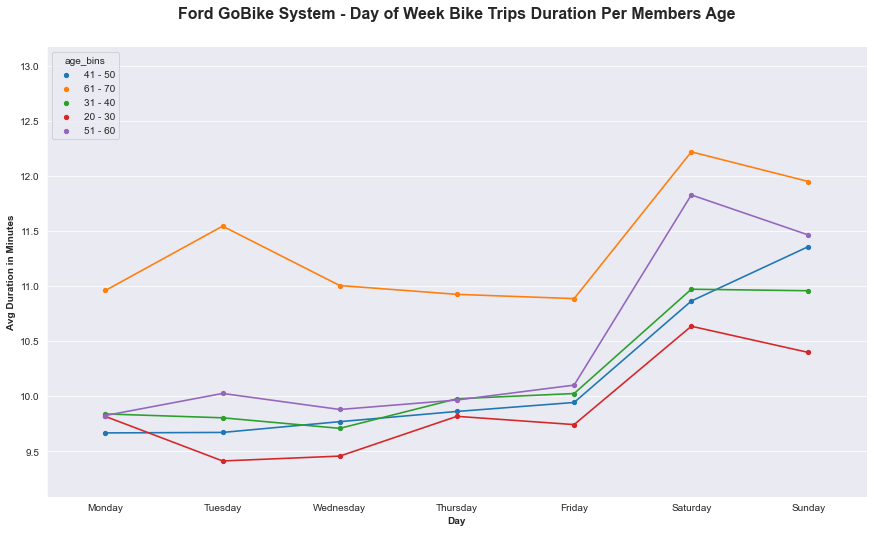

In [68]:
plt.figure(figsize =[14.70, 8.27])
sb.set_style("darkgrid")
sb.pointplot(data = minutes_df, x='start_day', y='duration_minutes', hue='age_bins', scale=0.6, order = order, height=5, aspect=2, errwidth=False);
plt.xlabel('Day', fontweight = 'bold')
plt.ylabel('Avg Duration in Minutes', fontweight = 'bold')
plt.title("Ford GoBike System - Day of Week Bike Trips Duration Per Members Age", y = 1.05, fontsize = 16, fontweight = 'bold');
sb.despine()

We see older people (61 -70) take longer trips in terms of duration, while people below 60 and in the working class bracket (20 - 40) take shorter trips during weekdays, as we've noticed in previous trends, there is always a spike in duration during 


## 7. Summary

This project was quite insightful as can be drawn from it some amazing trends between trip_duration, start_day, end_day ages and usertype

#### Key :   
Subscribers (i.e. daily commuters)
Customers (i.e. tourists, students, etc.) 

Renting a bike from the Ford GoBike System is a fantastic way of moving around in the city, both for enjoyment and work. There are two types of clients using the system : Subscribers and Customers.
Where the Subscribers are known to be primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm, and occasionally around lunch time.
Customers are known to be usually tourists or occassional riders who use the system mainly to explore the Bay Area.